In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder


In [45]:
train = pd.read_csv('data/train.csv')

In [30]:
train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.50,Ideal,D,VS2,62.3,55.0,5.11,5.07,3.17,1845
1,1,1.54,Good,I,VS1,63.6,60.0,7.30,7.33,4.65,10164
2,2,1.32,Very Good,J,SI2,61.7,60.0,6.95,7.01,4.31,5513
3,3,1.20,Ideal,I,SI1,62.1,55.0,6.83,6.79,4.23,5174
4,4,1.73,Premium,I,SI1,61.2,60.0,7.67,7.65,4.69,10957


In [5]:
train.shape

(40455, 11)

In [6]:
predict = pd.read_csv('data/predict.csv')

In [7]:
predict.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.45,Premium,E,SI1,62.8,58.0,4.88,4.84,3.05
1,1,1.23,Ideal,H,SI1,61.0,56.0,6.96,6.92,4.23
2,2,0.33,Ideal,I,IF,61.8,55.0,4.46,4.47,2.76
3,3,0.51,Premium,D,VS2,58.0,60.0,5.29,5.26,3.06
4,4,0.40,Premium,E,VS2,62.2,59.0,4.71,4.74,2.94


In [8]:
predict.shape

(13485, 10)

In [9]:
sample = pd.read_csv('data/sample_submission.csv')

In [10]:
sample.head()

,id,price
0,0,16964
1,1,6754
2,2,16579
3,3,10765
4,4,4971


In [11]:
sample.shape

(13485, 2)

In [12]:
train.dtypes
# There are there features as object type that I should check

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [13]:
train['cut'].unique()

array(['Ideal', 'Good', 'Very Good', 'Premium', 'Fair'], dtype=object)

In [14]:
train['color'].unique()

array(['D', 'I', 'J', 'G', 'E', 'H', 'F'], dtype=object)

In [15]:
train['clarity'].unique()

array(['VS2', 'VS1', 'SI2', 'SI1', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [16]:
train_dummies=pd.get_dummies(train)

<AxesSubplot:>

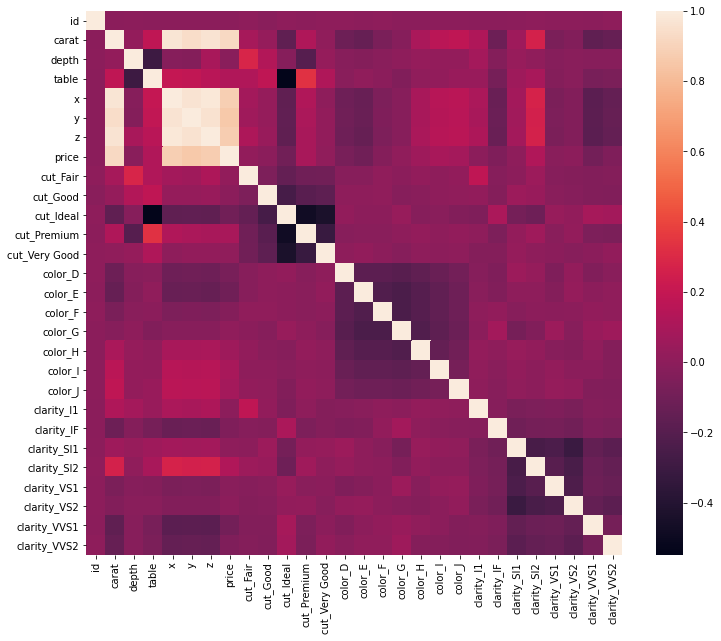

In [21]:
fig, ax = plt.subplots(figsize=(12,10))  
sns.heatmap((train_dummies).corr())

In [34]:
# I realised that the features 'cut', 'color' and 'clarity' have a stipulated order in 
# the dataset description so I decided to not use dummies. I tried with OrdinalEncoder 
# but it didn't work because the process didn't identify the alphabetical order 
color_values = train['color'].unique().reshape(-1, 1)
print(color_values)
encoder = OrdinalEncoder()
result = encoder.fit_transform(color_values)
print(result)

[['D']
 ['I']
 ['J']
 ['G']
 ['E']
 ['H']
 ['F']]
[[0.]
 [5.]
 [6.]
 [3.]
 [1.]
 [4.]
 [2.]]


In [50]:
# Then I decided to label encoding using map:
def clean_data(df):
    cut_values={'Fair':5, 'Good':4, 'Very Good':3, 'Premium':2, 'Ideal':1}
    clarity_values={'I1':8,'SI2':7,'SI1':6, 'VS2':5, 'VS1':4, 'VVS2':3, 'VVS1':2, 'IF':1}
    color_values={'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7}
    df['cut']=df['cut'].map(cut_values)
    df['clarity']=df['clarity'].map(clarity_values)
    df['color']=df['color'].map(color_values) 
    return df
train=clean_data(train)

In [31]:
# At last I discovered LabelEncoder:
color_values = train['color'].unique()
print(color_values)
encoder = LabelEncoder()
result = encoder.fit_transform(color_values)
print(result)

['D' 'I' 'J' 'G' 'E' 'H' 'F']
[0 5 6 3 1 4 2]


In [42]:
cut_values = train['cut'].unique()
print(cut_values)
encoder = LabelEncoder()
result = encoder.fit_transform(cut_values)
print(result)
clarity_values = train['clarity'].unique()
print(clarity_values)
encoder = LabelEncoder()
result = encoder.fit_transform(clarity_values)
print(result)
# But for 'cut' and 'clarity' I realised that I have to define the order before so I would spend 
# almost the same time creating the lists with the order. Then I keep the data with the map procedure.

['Ideal' 'Good' 'Very Good' 'Premium' 'Fair']
[2 1 4 3 0]
['VS2' 'VS1' 'SI2' 'SI1' 'VVS2' 'VVS1' 'I1' 'IF']
[5 4 3 2 7 6 0 1]


<AxesSubplot:>

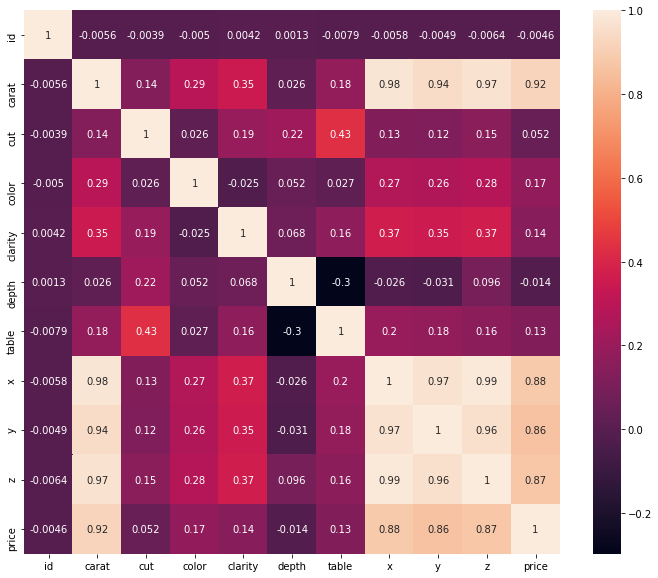

In [37]:
fig, ax = plt.subplots(figsize=(12,10))  
sns.heatmap((train).corr(),annot=True)

In [38]:
# x, y, z, and carat are correlated because this is the volume and weight of the diamond. 
# They are of course correlated with the price but any way I will check what happens if I remove these 3 features 
# that doesn't provide more information than the weight (all 4 features have almost the same correlation with 
# price and they are directly related between themselfs, so the colinearity is hugh).

In [47]:
df=train.drop(columns=['x','y','z'])

<AxesSubplot:>

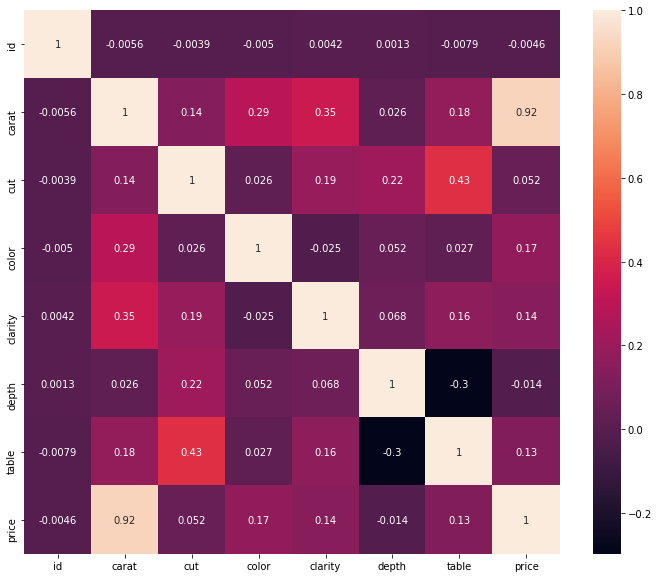

In [48]:
fig, ax = plt.subplots(figsize=(12,10))  
sns.heatmap((df).corr(),annot=True)

In [49]:
# Now all features have less than 0.5 correlation between them.

# SelectKBest to decide if any other feature should be removed

In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
df = pd.read_csv('data/train.csv').drop(columns=['id'])
df = clean_data(df)
y = df['price']
x = df.drop(columns='price')
selector = SelectKBest(mutual_info_regression, k=8).fit(x, y)
cols = selector.get_support(indices=True)
features_df_new = x.iloc[:,cols]
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.50,1,1,5,62.3,55.0,5.11,5.07,3.17,1845
1,1.54,4,6,4,63.6,60.0,7.30,7.33,4.65,10164
2,1.32,3,7,7,61.7,60.0,6.95,7.01,4.31,5513
3,1.20,1,6,6,62.1,55.0,6.83,6.79,4.23,5174
4,1.73,2,6,6,61.2,60.0,7.67,7.65,4.69,10957


In [52]:
features_df_new.head()
# I can see that SelectKBest has removed 'depth':

,carat,cut,color,clarity,table,x,y,z
0,0.50,1,1,5,55.0,5.11,5.07,3.17
1,1.54,4,6,4,60.0,7.30,7.33,4.65
2,1.32,3,7,7,60.0,6.95,7.01,4.31
3,1.20,1,6,6,55.0,6.83,6.79,4.23
4,1.73,2,6,6,60.0,7.67,7.65,4.69
